In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

diamonds=pd.read_csv('diamonds.csv')

# Putting target variable 'price' to the end of the dataset

temp=diamonds.price
diamonds.drop(['price'],axis=1,inplace=True)
diamonds['price']=temp

diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
diamonds.head()

#Dropping diamonds that don't have any dimensions

diamonds.drop(diamonds[diamonds['x']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['z']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['y']==0].index,inplace=True)

In [38]:
le=LabelEncoder()
df=diamonds.copy()
df[['cut','color','clarity']]=df[['cut','color','clarity']].apply(le.fit_transform)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [39]:
# Binning done by equal price range

df['price'] = pd.cut(diamonds.price,bins=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
19352,0.30,2,1,5,62.2,57.0,4.26,4.32,2.67,0
19351,0.31,2,1,5,61.8,56.0,4.35,4.37,2.69,0
19350,0.30,2,1,7,60.7,57.0,4.36,4.41,2.66,0
36544,0.40,3,2,2,62.6,59.0,4.74,4.68,2.95,0
...,...,...,...,...,...,...,...,...,...,...
27208,2.02,1,5,4,57.9,63.0,8.13,8.21,4.73,9
27209,2.36,2,6,5,60.1,59.0,8.64,8.69,5.21,9
27210,2.00,2,2,3,62.9,56.0,7.94,8.01,5.02,9
27212,2.29,3,4,5,61.6,60.0,8.45,8.43,5.20,9


In [40]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

def show_confusion_matrix(model):
    print('Accuracy: %.2f%%' % (accuracy_score(test_Y, predi) * 100))
    print('Precision: %.2f%%' % (precision_score(test_Y, predi, average='macro') * 100))
    print('Recall: %.2f%%' % (recall_score(test_Y, predi, average='macro') * 100))
    print('F1_Score: %.2f%%' % (f1_score(test_Y, predi, average='macro') * 100))
    confusion_matrix_model = confusion_matrix(test_Y, predi)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')

In [41]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
predi=knn.predict(test_X)
accuracy_score(predi,test_Y)

0.7927485163204748

Accuracy: 79.27%
Precision: 58.97%
Recall: 58.28%
F1_Score: 58.53%


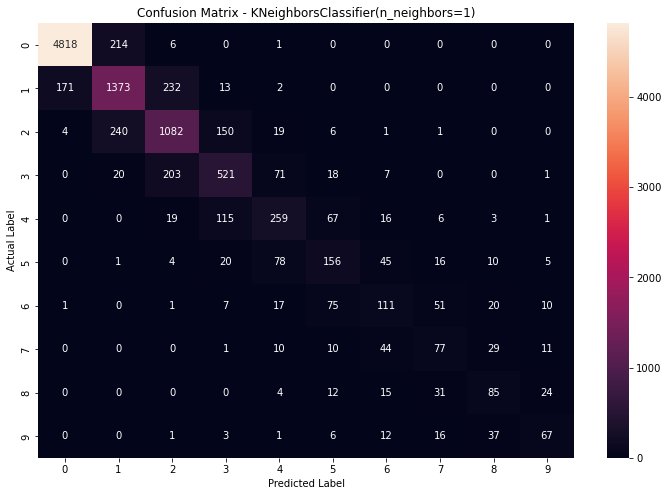

In [42]:
show_confusion_matrix(knn)

In [43]:
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
predi=gnb.predict(test_X)
accuracy_score(predi,test_Y)

0.7091988130563798

Accuracy: 70.92%
Precision: 39.34%
Recall: 40.99%
F1_Score: 37.97%


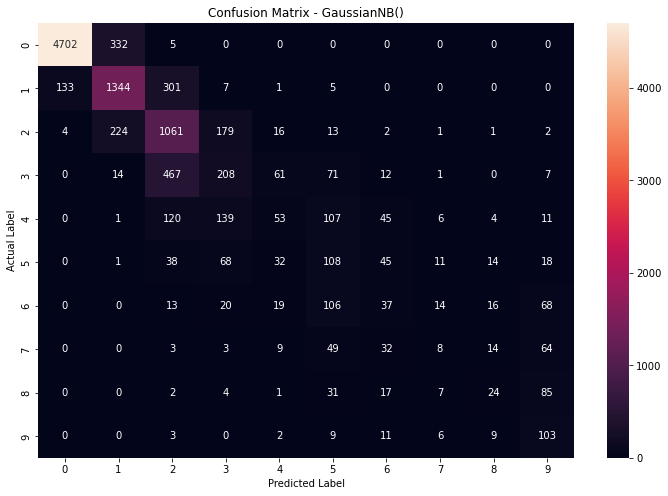

In [44]:
show_confusion_matrix(gnb)

In [45]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
predi=dt.predict(test_X)
accuracy_score(predi,test_Y)

0.8353115727002968

Accuracy: 83.53%
Precision: 62.77%
Recall: 63.14%
F1_Score: 62.90%


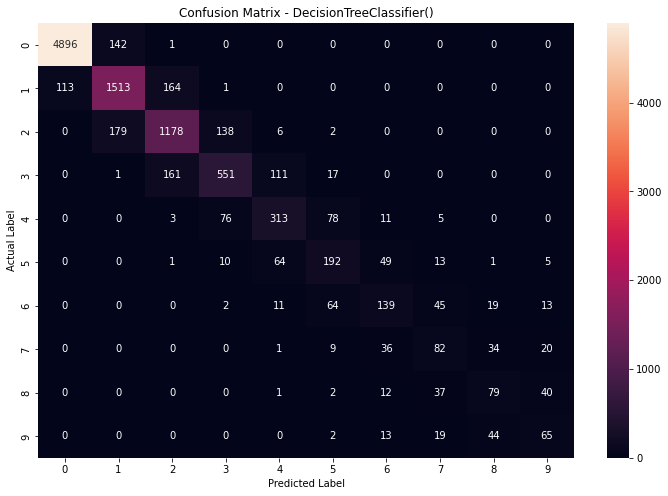

In [46]:
show_confusion_matrix(dt)

In [47]:
xgboost=XGBClassifier()
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.8707344213649851

Accuracy: 87.07%
Precision: 68.25%
Recall: 68.73%
F1_Score: 68.42%


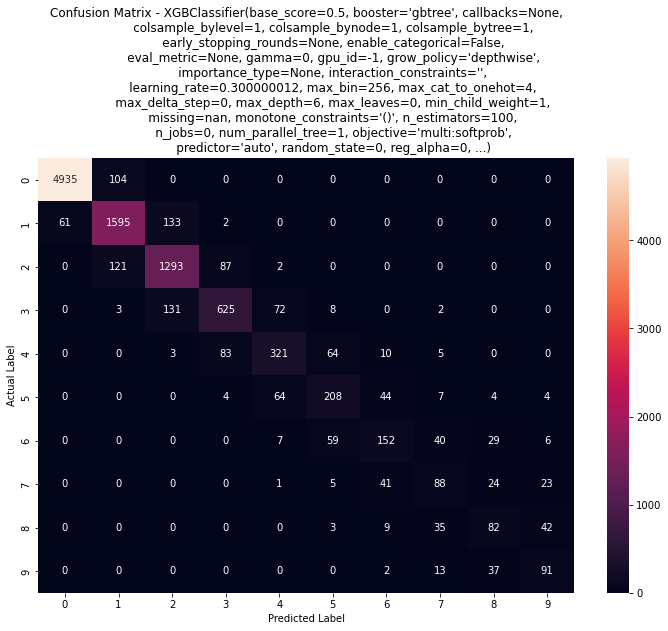

In [48]:
show_confusion_matrix(xgboost)

In [49]:
randomforest=RandomForestClassifier()
randomforest.fit(train_X,train_Y)
predi=randomforest.predict(test_X)
accuracy_score(predi,test_Y)

0.8715689910979229

Accuracy: 87.16%
Precision: 69.67%
Recall: 70.06%
F1_Score: 69.79%


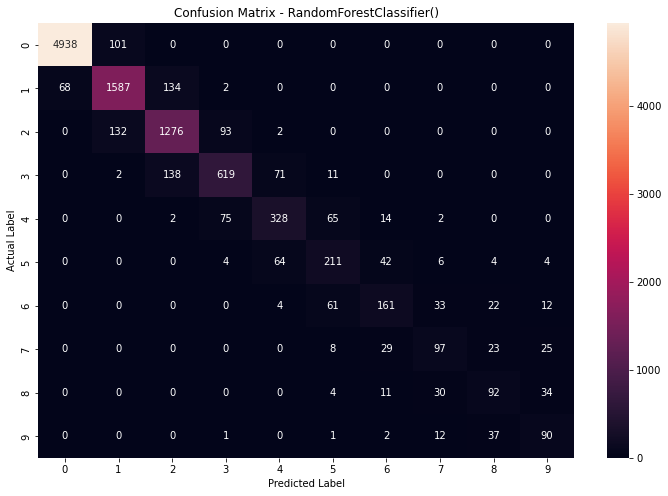

In [50]:
show_confusion_matrix(randomforest)

In [51]:
gradientboosting=GradientBoostingClassifier()
gradientboosting.fit(train_X,train_Y)
predi=gradientboosting.predict(test_X)
accuracy_score(predi,test_Y)

0.8403189910979229

Accuracy: 84.03%
Precision: 60.43%
Recall: 60.15%
F1_Score: 60.18%


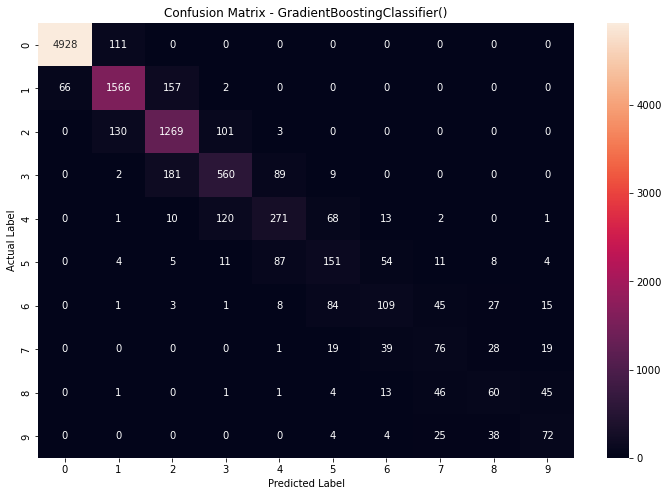

In [52]:
show_confusion_matrix(gradientboosting)

In [53]:
adaboost=AdaBoostClassifier()
adaboost.fit(train_X,train_Y)
predi=adaboost.predict(test_X)
accuracy_score(predi,test_Y)

0.6057121661721068

Accuracy: 60.57%
Precision: 16.53%
Recall: 19.95%
F1_Score: 14.92%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


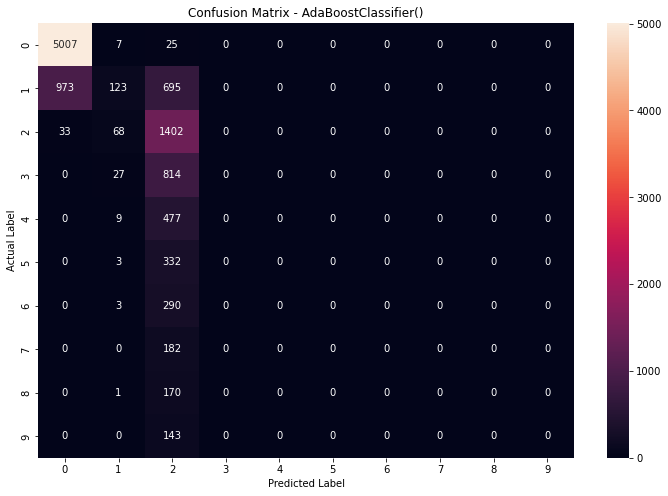

In [54]:
show_confusion_matrix(adaboost)